# Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

In [2]:
from Functions import bool_from_index, name_from_index, zscore
from Functions import get_ages_cols, get_param_names, get_category_dict, get_category_from_feature

## Directories etc.

In [3]:
data_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta"
data_save_path = os.path.join(data_path, "all_data")

In [4]:
param_names = get_param_names()
ages_cols = get_ages_cols()
category_dict = get_category_dict()

In [5]:
wanted_cols = [
    
    # Participant info
    'ID', 'PreciseYrs', 'BMI', 'sex', 'meanT', 'PDS', 'age_group_', 'PDS_group_', 'T_group_',
    
    # Basic performance
    'bf_ACC', 'bf_RT', 'bf_RTsd', 'bf_ACC_delta', 'bf_RT_delta', 'bf_miss',
    'rl_ACC', 'rl_RT', 'rl_RTsd', 'rl_ACC_delta', 'rl_RT_delta', 'rl_miss',
    'ps_ACC', 'ps_RT', 'ps_RTsd', 'ps_ACC_delta', 'ps_RT_delta', 'ps_miss',

    # WSLS & stay
    'bf_WS', 'bf_LS', 'bf_stay_choice', 'bf_stay_motor',
    'rl_WS', 'rl_LS', 'rl_stay_choice', 'rl_stay_motor',
    'ps_WS', 'ps_LS', 'ps_stay', 

    # Parameters
    'bf_alpha', 'bf_1_over_beta', 'bf_forget',  # 'bf_nalpha',
    'rl_log_alpha', 'rl_log_nalpha', 'rl_forget', 'rl_rho', 'rl_epsilon_1_over_beta', 'rl_K',
    'ps_alpha', 'ps_nalpha', 'ps_1_over_beta', 'ps_persev', 'ps_p_switch', 'ps_p_reward',
    
    # Additional measures
    'rl_RT_ns_slope_delta', 'rl_ACC_ns_slope_delta', 'rl_RT_ns_slope', 'rl_ACC_ns_slope', 'rl_lrn_ns_sig', 'rl_lrn_delay_sig', 'rl_lrn_pcor_sig', 'rl_lrn_pinc_sig',
    'ps_n_switches', 'ps_LWS', 'ps_criterion_trial',
    'bf_ACC_first3trials', 'bf_asymptote', 'bf_learning_slope', 'bf_intercept', 'bf_prew', 'bf_delay',
]

# Format all_data

## Read in all_data and selected wanted columns

In [6]:
all_data = pd.read_csv(os.path.join(data_save_path, "all_data_raw.csv"), index_col=0)
all_data = all_data[wanted_cols]
all_data

,ID,PreciseYrs,BMI,sex,meanT,PDS,age_group_,PDS_group_,T_group_,bf_ACC,...,rl_lrn_pinc_sig,ps_n_switches,ps_LWS,ps_criterion_trial,bf_ACC_first3trials,bf_asymptote,bf_learning_slope,bf_intercept,bf_prew,bf_delay
0,17,8.657084,18.200751,Female,NaN,2.50,08-10,2_mid,NaN,0.56667,...,0.551939,8,1.000000,3.666667,0.333333,0.59077,-0.053115,0.255267,-0.318745,-0.108595
1,18,12.637919,16.157863,Female,NaN,2.25,10-13,1_early,NaN,0.80000,...,0.591403,8,0.904762,4.222222,0.250000,0.96463,-2.393200,1.930379,1.195528,-0.120319
2,20,14.543463,17.433768,Male,120.649667,2.80,13-15,3_late,3_100%,0.85000,...,0.602181,8,0.950000,4.000000,0.500000,0.98363,-2.137900,2.352541,1.329053,-0.168739
3,22,16.490075,22.709959,Male,147.334443,3.00,15-17,3_late,3_100%,0.73333,...,0.610240,7,0.933333,4.250000,0.416667,0.82375,-1.937400,1.152193,0.528728,-0.163958
4,23,11.206023,15.147686,Male,27.712900,1.00,10-13,0_pre,1_50%,0.81667,...,0.504245,8,1.000000,3.714286,0.666667,0.88317,-1.730200,1.548147,0.690841,-0.190590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,465,22.333333,NaN,Female,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.74167,...,0.427490,8,1.000000,3.625000,0.666667,0.75862,3.626000,1.238689,0.644662,-0.135437
243,466,20.083333,NaN,Male,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.60833,...,0.456066,8,1.000000,3.750000,0.583333,0.63033,-1.718600,0.566666,0.213814,-0.238006
244,467,18.750000,NaN,Female,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.80000,...,0.575711,7,1.000000,4.000000,0.750000,0.80872,-0.662550,1.276838,0.174681,-0.118256
245,468,21.833333,NaN,Female,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.71667,...,0.547732,7,1.000000,5.000000,0.500000,0.73918,-0.539960,0.941660,0.174725,-0.110450


In [7]:
# all_data['ps_1_over_beta'] = (all_data['ps_1_over_beta_rl'] + all_data['ps_1_over_beta_bf']) / 2
# all_data['ps_persev'] = (all_data['ps_persev_rl'] + all_data['ps_persev_bf']) / 2
# all_data = all_data.drop(columns=['ps_persev_rl', 'ps_persev_bf', 'ps_1_over_beta_rl', 'ps_1_over_beta_bf'])
# # all_data.columns

In [8]:
all_data.to_csv(os.path.join(data_save_path, 'all_data.csv'))
all_data

,ID,PreciseYrs,BMI,sex,meanT,PDS,age_group_,PDS_group_,T_group_,bf_ACC,...,rl_lrn_pinc_sig,ps_n_switches,ps_LWS,ps_criterion_trial,bf_ACC_first3trials,bf_asymptote,bf_learning_slope,bf_intercept,bf_prew,bf_delay
0,17,8.657084,18.200751,Female,NaN,2.50,08-10,2_mid,NaN,0.56667,...,0.551939,8,1.000000,3.666667,0.333333,0.59077,-0.053115,0.255267,-0.318745,-0.108595
1,18,12.637919,16.157863,Female,NaN,2.25,10-13,1_early,NaN,0.80000,...,0.591403,8,0.904762,4.222222,0.250000,0.96463,-2.393200,1.930379,1.195528,-0.120319
2,20,14.543463,17.433768,Male,120.649667,2.80,13-15,3_late,3_100%,0.85000,...,0.602181,8,0.950000,4.000000,0.500000,0.98363,-2.137900,2.352541,1.329053,-0.168739
3,22,16.490075,22.709959,Male,147.334443,3.00,15-17,3_late,3_100%,0.73333,...,0.610240,7,0.933333,4.250000,0.416667,0.82375,-1.937400,1.152193,0.528728,-0.163958
4,23,11.206023,15.147686,Male,27.712900,1.00,10-13,0_pre,1_50%,0.81667,...,0.504245,8,1.000000,3.714286,0.666667,0.88317,-1.730200,1.548147,0.690841,-0.190590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,465,22.333333,NaN,Female,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.74167,...,0.427490,8,1.000000,3.625000,0.666667,0.75862,3.626000,1.238689,0.644662,-0.135437
243,466,20.083333,NaN,Male,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.60833,...,0.456066,8,1.000000,3.750000,0.583333,0.63033,-1.718600,0.566666,0.213814,-0.238006
244,467,18.750000,NaN,Female,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.80000,...,0.575711,7,1.000000,4.000000,0.750000,0.80872,-0.662550,1.276838,0.174681,-0.118256
245,468,21.833333,NaN,Female,NaN,NaN,2Stud.,4_Stud.,4_Stud.,0.71667,...,0.547732,7,1.000000,5.000000,0.500000,0.73918,-0.539960,0.941660,0.174725,-0.110450


In [9]:
all_data_z = all_data[ages_cols]
for col in [col for col in all_data.columns if not col in ages_cols]:
    all_data_z[col] = zscore(all_data[col])
    
# Save
all_data_z.to_csv(os.path.join(data_save_path, 'all_data_z.csv'))
all_data_z

<ipython-input-9-2b942e000e6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,bf_ACC,...,rl_lrn_pinc_sig,ps_n_switches,ps_LWS,ps_criterion_trial,bf_ACC_first3trials,bf_asymptote,bf_learning_slope,bf_intercept,bf_prew,bf_delay
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,-1.449943,...,0.101177,0.756023,0.528998,-0.589174,-1.409289,-1.606155,0.509726,-1.465358,-2.017761,0.723703
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,0.185568,...,0.505223,0.756023,-0.002945,0.453916,-1.918199,0.842331,-0.378357,0.258532,0.749533,0.573609
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100%,0.536040,...,0.615565,0.756023,0.249728,0.036680,-0.391469,0.966766,-0.281469,0.692987,0.993548,-0.046277
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100%,-0.281751,...,0.698076,-0.389607,0.156638,0.506071,-0.900379,-0.080321,-0.205377,-0.542314,-0.469027,0.014931
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50%,0.302416,...,-0.387140,0.756023,0.528998,-0.499766,0.626351,0.308833,-0.126743,-0.134831,-0.172768,-0.326015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,-0.223292,...,-1.172984,0.756023,0.528998,-0.667406,0.626351,-0.506871,1.905983,-0.453300,-0.257159,0.380071
243,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,-1.157930,...,-0.880409,0.756023,0.528998,-0.432711,0.117441,-1.347068,-0.122341,-1.144892,-1.044524,-0.933035
244,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,0.185568,...,0.344556,-0.389607,0.528998,0.036680,1.135261,-0.178756,0.278440,-0.414040,-1.116037,0.600023
245,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,-0.398528,...,0.058096,-0.389607,0.528998,1.914243,-0.391469,-0.634187,0.324964,-0.758977,-1.115958,0.699948


In [10]:
all_measures = [c for c in all_data.columns if c not in ages_cols]
dict_measures = []
for cat in category_dict:
    dict_measures += category_dict[cat]

missing_measures = [m for m in all_measures if m not in dict_measures]
assert len(missing_measures) == 0, 'The following columns need a category: {}'.format(missing_measures)

In [11]:
# Melt all_data
all_data_long = all_data.melt(id_vars=ages_cols, var_name='feature')

# Add columns
all_data_long['category'] = get_category_from_feature(all_data_long['feature'], category_dict)
all_data_long['task'] = all_data_long.feature.apply(lambda x : x[:2])
all_data_long['param'] = all_data_long.feature.apply(lambda x : x[3:])

# Save
all_data_long.to_csv(os.path.join(data_save_path, 'all_data_long.csv'))
all_data_long

,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,feature,value,category,task,param
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,bf_ACC,0.566670,ACC,bf,ACC
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,bf_ACC,0.800000,ACC,bf,ACC
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100%,bf_ACC,0.850000,ACC,bf,ACC
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100%,bf_ACC,0.733330,ACC,bf,ACC
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50%,bf_ACC,0.816670,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15062,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.135437,Forget,bf,delay
15063,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.238006,Forget,bf,delay
15064,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.118256,Forget,bf,delay
15065,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.110450,Forget,bf,delay


In [12]:
# Melt all_data_z
all_data_long_z = all_data_z.melt(id_vars=ages_cols, var_name='feature')

# Add columns
all_data_long_z['category'] = get_category_from_feature(all_data_long_z['feature'], category_dict)
all_data_long_z['task'] = all_data_long_z.feature.apply(lambda x : x[:2])
all_data_long_z['param'] = all_data_long_z.feature.apply(lambda x : x[3:])

# Save
all_data_long_z.to_csv(os.path.join(data_save_path, 'all_data_long_z.csv'))
all_data_long_z

,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,feature,value,category,task,param
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,bf_ACC,-1.449943,ACC,bf,ACC
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,bf_ACC,0.185568,ACC,bf,ACC
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100%,bf_ACC,0.536040,ACC,bf,ACC
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100%,bf_ACC,-0.281751,ACC,bf,ACC
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50%,bf_ACC,0.302416,ACC,bf,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15062,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,0.380071,Forget,bf,delay
15063,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,bf_delay,-0.933035,Forget,bf,delay
15064,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,0.600023,Forget,bf,delay
15065,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,bf_delay,0.699948,Forget,bf,delay


# Check that everything looks good

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


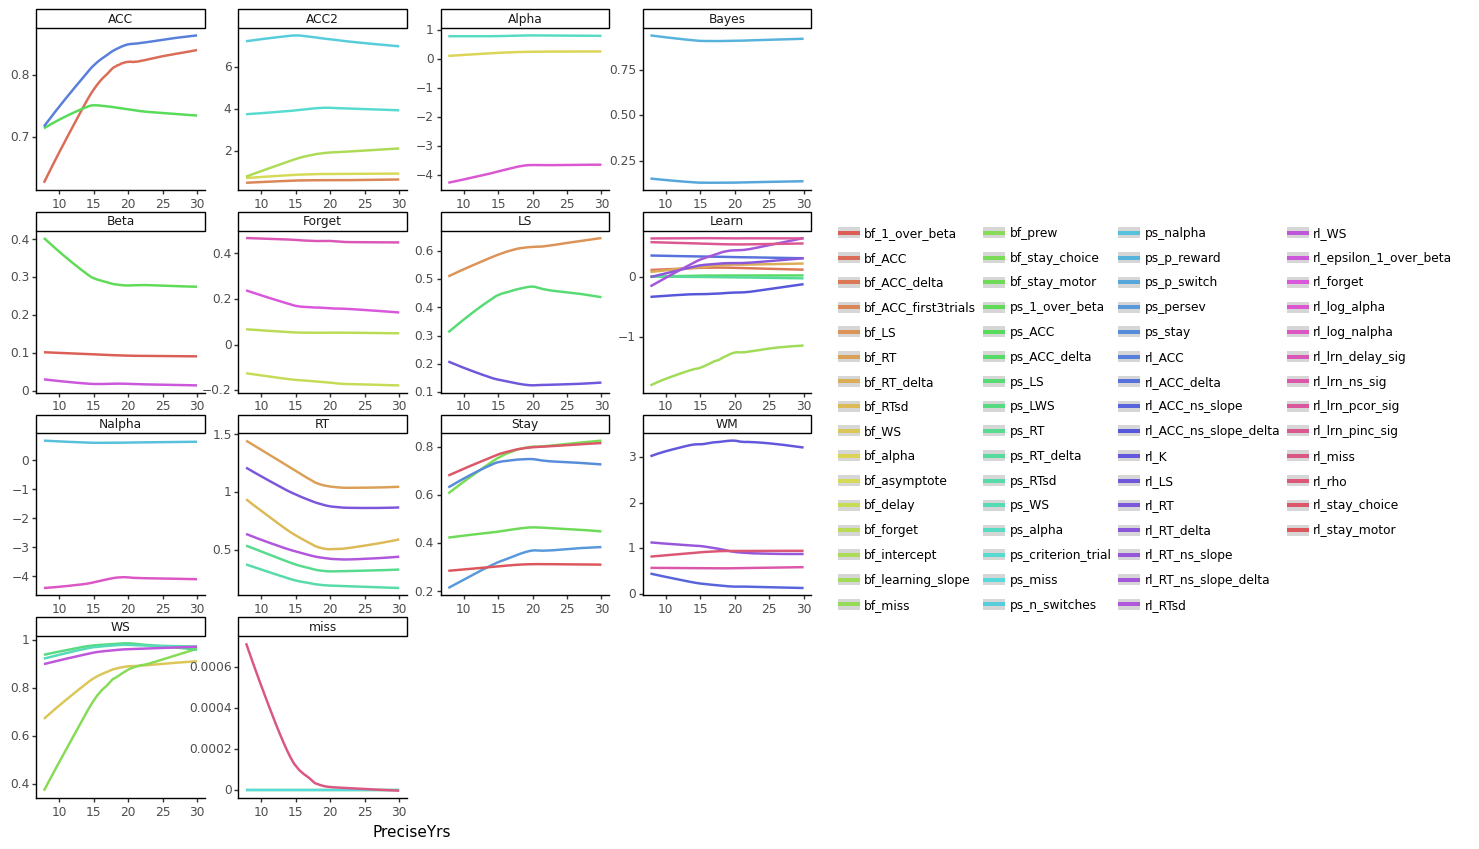

<ggplot: (168131123604)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


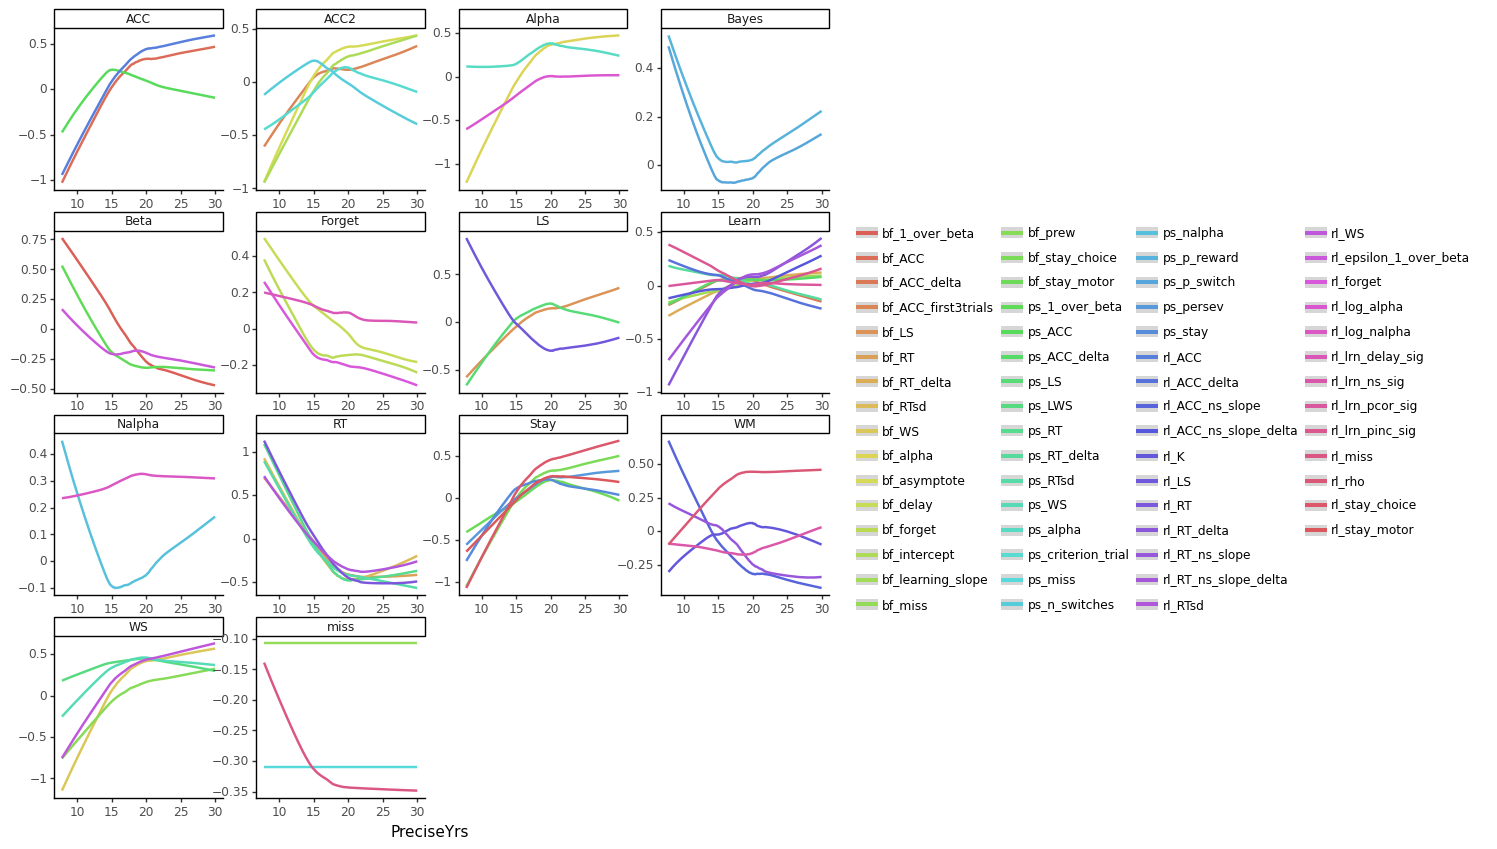

<ggplot: (168131123604)>


In [13]:
# Group features
gg.options.figure_size = (10, 10)
g = (gg.ggplot(
    all_data_long,#[all_data_long.category == 'Learn'],
    gg.aes('PreciseYrs', 'value', group='feature', color='feature'))
#  + gg.geom_point(size=0.5, alpha=0.5)
#  + gg.theme(legend_position='none')
 + gg.geom_smooth()
 + gg.labs(y='', color='')
 + gg.theme(subplots_adjust={'hspace': 0.25, 'wspace': 0.2})
 + gg.facet_wrap('~ category', scales='free')
)
print(g)

g_z = g
g_z.data = all_data_long_z#[all_data_long_z.category == 'WM']

print(g_z)